

# Mobile Price Prediction

This Dataset is collected by Scraping the Data Online Websites.
The Columns are as follows.

Name: This column contains the name of the mobile phone.

Rating: This column contains the ratings given to the phone. the minimum rating is 0. and maximum rating is 5.

Spec_score: This column contains the score given to the phone on the basic of its specifications. This minimum value is 0 and maximum value is 100.

No_of_sim: This column contains whether the phone is dual sim, has 3g, 4g, 5g, volte.

RAM: This column contains the information about the RAM of the phone

Battery: This column provides information about battery specification of the phone.

Display: This column contains information about the screen size of the phone.

Camera: This column provides information about the camera, rear and front.

External_Memory: This column contains information whether a device support external memory and
how much.

Android_version: This column tells us about the android version of the phone.

Price: Price of the phone.

Company: The company to which the phone belongs.

Inbuilt_memory: This column provides information about the inbuilt memory of the phone.

fast_charging: It contains whether the device supports fast charging or not. if yes then how much.

Screen_resolution: This describes the screen resolution of the phone.

Processor: This column gives information about the processor of the phone.

Processor_name: This column describes the name of the processor.

**Project: Mobile Phone Price Category Prediction**

1. Objective:
Predict whether a mobile phone belongs to a low-price or high-price category based on its specifications (RAM, Battery, Camera, Inbuilt Memory, etc.). This helps users or retailers quickly classify phones without manual inspection.

2. Dataset:

Source: Scraped from online mobile phone websites.

Description: 384 KB CSV file containing ~1370 rows of phones with features: Name, Price, RAM, Battery, Camera, Display, External Memory, Processor, Processor Name, Android Version, Company, etc.

Target: Binary category: Low (0) / High (1) based on median price.

3. Preprocessing:

Select numeric and meaningful features: RAM, Battery, Camera, Inbuilt_memory.

Extract numeric values from strings (e.g., '8 GB RAM' → 8).

One-hot encode categorical features if used.

Fill missing values with 0.

Standardize features using StandardScaler.

Train-test split: 80% train, 20% test.

4. Model Architecture:

Single-Layer Perceptron (SLP): 1 output neuron with sigmoid activation.

Multi-Layer Perceptron (MLP): Dense(256)-ReLU  → Dense(64)-ReLU → Dense(1)-Sigmoid.

Optimized ANN: Dense(128)-ReLU → Dropout(0.2) → Dense(64)-ReLU → Dropout(0.2) → Dense(1)-Sigmoid.

5. Training:

Optimizer: Adam

Loss: Binary Crossentropy

Epochs: 45

Batch Size: 16

Validation Split: 20%

EarlyStopping

6. Evaluation:

Metrics: Accuracy, Precision, Recall, F1-score, Confusion Matrix

Test Accuracy:

SLP: ~86

Deep MLP: ~93

Optimized ANN: ~95

Compare actual vs predicted values.

7. Extensions:

Use additional features like Display, Processor, Android Version.

Predict exact price range (multi-class classification) instead of binary.

Build a web dashboard for real-time price category prediction.

Hyperparameter tuning with Keras Tuner or GridSearch.

8. Tools:

Python (Pandas, NumPy, Matplotlib, Scikit-learn)

TensorFlow / Keras for neural networks

Google Colab

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df = pd.read_csv('/content/drive/MyDrive/GNCIPL_AI_ML/mobile phone price prediction.csv')
df.head()

,Unnamed: 0,Name,Rating,Spec_score,No_of_sim,Ram,Battery,Display,Camera,External_Memory,Android_version,Price,company,Inbuilt_memory,fast_charging,Screen_resolution,Processor,Processor_name
0,0,Samsung Galaxy F14 5G,4.65,68,"Dual Sim, 3G, 4G, 5G, VoLTE,",4 GB RAM,6000 mAh Battery,6.6 inches,50 MP + 2 MP Dual Rear &amp; 13 MP Front Camera,"Memory Card Supported, upto 1 TB",13,"9,999",Samsung,128 GB inbuilt,25W Fast Charging,2408 x 1080 px Display with Water Drop Notch,Octa Core Processor,Exynos 1330
1,1,Samsung Galaxy A11,4.20,63,"Dual Sim, 3G, 4G, VoLTE,",2 GB RAM,4000 mAh Battery,6.4 inches,13 MP + 5 MP + 2 MP Triple Rear &amp; 8 MP Fro...,"Memory Card Supported, upto 512 GB",10,"9,990",Samsung,32 GB inbuilt,15W Fast Charging,720 x 1560 px Display with Punch Hole,1.8 GHz Processor,Octa Core
2,2,Samsung Galaxy A13,4.30,75,"Dual Sim, 3G, 4G, VoLTE,",4 GB RAM,5000 mAh Battery,6.6 inches,50 MP Quad Rear &amp; 8 MP Front Camera,"Memory Card Supported, upto 1 TB",12,"11,999",Samsung,64 GB inbuilt,25W Fast Charging,1080 x 2408 px Display with Water Drop Notch,2 GHz Processor,Octa Core
3,3,Samsung Galaxy F23,4.10,73,"Dual Sim, 3G, 4G, VoLTE,",4 GB RAM,6000 mAh Battery,6.4 inches,48 MP Quad Rear &amp; 13 MP Front Camera,"Memory Card Supported, upto 1 TB",12,"11,999",Samsung,64 GB inbuilt,NaN,720 x 1600 px,Octa Core,Helio G88
4,4,Samsung Galaxy A03s (4GB RAM + 64GB),4.10,69,"Dual Sim, 3G, 4G, VoLTE,",4 GB RAM,5000 mAh Battery,6.5 inches,13 MP + 2 MP + 2 MP Triple Rear &amp; 5 MP Fro...,"Memory Card Supported, upto 1 TB",11,"11,999",Samsung,64 GB inbuilt,15W Fast Charging,720 x 1600 px Display with Water Drop Notch,Octa Core,Helio P35


In [4]:
df.shape

(1370, 18)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1370 entries, 0 to 1369
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         1370 non-null   int64  
 1   Name               1370 non-null   object 
 2   Rating             1370 non-null   float64
 3   Spec_score         1370 non-null   int64  
 4   No_of_sim          1370 non-null   object 
 5   Ram                1370 non-null   object 
 6   Battery            1370 non-null   object 
 7   Display            1370 non-null   object 
 8   Camera             1370 non-null   object 
 9   External_Memory    1370 non-null   object 
 10  Android_version    927 non-null    object 
 11  Price              1370 non-null   object 
 12  company            1370 non-null   object 
 13  Inbuilt_memory     1351 non-null   object 
 14  fast_charging      1281 non-null   object 
 15  Screen_resolution  1368 non-null   object 
 16  Processor          1342 

In [6]:
df.columns

Index(['Unnamed: 0', 'Name', 'Rating', 'Spec_score', 'No_of_sim', 'Ram',
       'Battery', 'Display', 'Camera', 'External_Memory', 'Android_version',
       'Price', 'company', 'Inbuilt_memory', 'fast_charging',
       'Screen_resolution', 'Processor', 'Processor_name'],
      dtype='object')

In [7]:
df.describe()

,Unnamed: 0,Rating,Spec_score
count,1370.000000,1370.000000,1370.000000
mean,684.500000,4.374416,80.234307
std,395.629246,0.230176,8.373922
min,0.000000,3.750000,42.000000
25%,342.250000,4.150000,75.000000
50%,684.500000,4.400000,82.000000
75%,1026.750000,4.550000,86.000000
max,1369.000000,4.750000,98.000000


In [8]:
df.shape

(1370, 18)

# **Data Cleaning**

In [9]:
df.columns = df.columns.str.replace(' ', '_')
df.columns

Index(['Unnamed:_0', 'Name', 'Rating', 'Spec_score', 'No_of_sim', 'Ram',
       'Battery', 'Display', 'Camera', 'External_Memory', 'Android_version',
       'Price', 'company', 'Inbuilt_memory', 'fast_charging',
       'Screen_resolution', 'Processor', 'Processor_name'],
      dtype='object')

In [10]:
df.drop(columns=['Name'], inplace=True)

In [11]:
# drop column 'Unnamed'
df = df.drop(columns='Unnamed:_0')

In [12]:
df.dropna(axis=1, how='all',inplace=True)

In [13]:

# check null column
df.isnull().sum()

,0
Rating,0
Spec_score,0
No_of_sim,0
Ram,0
Battery,0
Display,0
Camera,0
External_Memory,0
Android_version,443
Price,0


In [14]:
# remove null values from Andriod version columns
df['Android_version'] = df['Android_version'].fillna(df['Android_version'].mode()[0])
df['Android_version'].isnull().sum()


np.int64(0)

In [15]:
df['Screen_resolution'] = df['Screen_resolution'].fillna(df['Screen_resolution'].mode()[0])
df['Screen_resolution'].isnull().sum()

np.int64(0)

In [16]:
df['fast_charging'] = df['fast_charging'].fillna(df['fast_charging'].mode()[0])
df['fast_charging'].isnull().sum()

np.int64(0)

In [17]:
df['Inbuilt_memory'] = df['Inbuilt_memory'].fillna(df['Inbuilt_memory'].mode()[0])
df['Inbuilt_memory'].isnull().sum()

np.int64(0)

In [18]:
df['Processor']= df['Processor'].fillna(df['Processor'].mode()[0])
df['Processor'].isnull().sum()

np.int64(0)

In [19]:
# check for duplicates columns
df.duplicated().sum()

np.int64(1)

## displays the number of unique values for each column in the DataFrame

In [20]:
df.nunique()

,0
Rating,20
Spec_score,50
No_of_sim,9
Ram,16
Battery,89
Display,89
Camera,347
External_Memory,85
Android_version,23
Price,449


The Overview Information is "Name" has 1334 values,etc.

# Data Preprocessing

In [21]:
df['Battery'].head()

,Battery
0,6000 mAh Battery
1,4000 mAh Battery
2,5000 mAh Battery
3,6000 mAh Battery
4,5000 mAh Battery


In [22]:
# Clean Battery column by keeping only numbers and converting to integer
df['Battery'] = df['Battery'].str.replace(r'\D', '', regex=True).astype(int)

In [23]:
df['Battery'].head()

,Battery
0,6000
1,4000
2,5000
3,6000
4,5000


In [24]:
df['Display'].head()

,Display
0,6.6 inches
1,6.4 inches
2,6.6 inches
3,6.4 inches
4,6.5 inches


In [25]:
df['Display'] = df['Display'].str.extract(r'(\d+\.?\d*)').astype(float)
df['Display'].head()

,Display
0,6.6
1,6.4
2,6.6
3,6.4
4,6.5


In [26]:
df['Price'].head()

,Price
0,"9,999"
1,"9,990"
2,"11,999"
3,"11,999"
4,"11,999"


In [27]:
df['Price'] = df['Price'].replace('[₹, ]','', regex=True).astype(float)
df['Price'].head()

,Price
0,9999.0
1,9990.0
2,11999.0
3,11999.0
4,11999.0


In [28]:
df['Ram'].head()

,Ram
0,4 GB RAM
1,2 GB RAM
2,4 GB RAM
3,4 GB RAM
4,4 GB RAM


In [29]:

#Removes all non-numeric characters from the RAM column (like "GB", spaces, text), leaving only digits, and then converts them into integers.

df['Ram'] = df['Ram'].astype(str).str.replace(r'\D', '', regex=True).astype(int)
df['Ram'].head()

,Ram
0,4
1,2
2,4
3,4
4,4


In [30]:
df['External_Memory'].head()

,External_Memory
0,"Memory Card Supported, upto 1 TB"
1,"Memory Card Supported, upto 512 GB"
2,"Memory Card Supported, upto 1 TB"
3,"Memory Card Supported, upto 1 TB"
4,"Memory Card Supported, upto 1 TB"


In [31]:
df['External_Memory'] = df['External_Memory'].str.extract(r'(\d+)').fillna(0).astype(int)
df['External_Memory'].head()

,External_Memory
0,1
1,512
2,1
3,1
4,1


In [32]:
df['Inbuilt_memory'].head()

,Inbuilt_memory
0,128 GB inbuilt
1,32 GB inbuilt
2,64 GB inbuilt
3,64 GB inbuilt
4,64 GB inbuilt


In [33]:
df['Inbuilt_memory'] = df['Inbuilt_memory'].astype(str).str.replace(r'[^\d]', '', regex=True).replace('', '0', regex=False).astype(int)
df['Inbuilt_memory'].head()

,Inbuilt_memory
0,128
1,32
2,64
3,64
4,64


In [34]:
df['fast_charging'].head()

,fast_charging
0,25W Fast Charging
1,15W Fast Charging
2,25W Fast Charging
3,18W Fast Charging
4,15W Fast Charging


In [35]:
#converts the column into string format
df['fast_charging'] = df['fast_charging'].astype(str)
df['fast_charging'].head()


,fast_charging
0,25W Fast Charging
1,15W Fast Charging
2,25W Fast Charging
3,18W Fast Charging
4,15W Fast Charging


In [36]:
#It extracts only the number from the text
df['fast_charging'] = df['fast_charging'].str.extract(r'(\d+\.?\d*)').fillna(0).astype(float)
df['fast_charging'].head()

,fast_charging
0,25.0
1,15.0
2,25.0
3,18.0
4,15.0


In [37]:
df['Camera'].str.extract(r'(\d+)').astype(float)


,0
0,50.0
1,13.0
2,50.0
3,48.0
4,13.0
...,...
1365,50.0
1366,50.0
1367,50.0
1368,50.0


In [38]:
#3. Create Target Category (Low / High)
# ----------------------------------------
# Find median price
median_price = df['Price'].median()

# Create empty Category column
df["Category"] = ""

# Assign values without lambda
df.loc[df["Price"] < median_price, "Category"] = "Low"
df.loc[df["Price"] >= median_price, "Category"] = "High"

# Check counts
print(df["Category"].value_counts())


Category
High    687
Low     683
Name: count, dtype: int64


In [39]:
# understanding categorical and numerical columns
categorical_cols = df.select_dtypes(include=['object']).columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

In [40]:
categorical_cols

Index(['No_of_sim', 'Camera', 'Android_version', 'company',
       'Screen_resolution', 'Processor', 'Processor_name', 'Category'],
      dtype='object')

In [41]:
numerical_cols

Index(['Rating', 'Spec_score', 'Ram', 'Battery', 'Display', 'External_Memory',
       'Price', 'Inbuilt_memory', 'fast_charging'],
      dtype='object')

In [42]:
# Drop Unnecessary Columns
df_clean = df.drop([
    "Ram","Battery","Camera","Display",
    "External_Memory","Inbuilt_memory","fast_charging","Price"
], axis=1)


## check outliers

In [43]:
outlier_report = {}

for col in numerical_cols:
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q3 - Q1

  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]

  outlier_report[col] = len(outliers)
outlier_report

{'Rating': 0,
 'Spec_score': 17,
 'Ram': 337,
 'Battery': 323,
 'Display': 97,
 'External_Memory': 240,
 'Price': 97,
 'Inbuilt_memory': 59,
 'fast_charging': 36}

In [44]:
columns_to_treat = ['Spec_score','Ram','Battery','Display','Rating','External_Memory','Price','Inbuilt_memory','fast_charging']

for col in columns_to_treat:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]

    outlier_report[col] = len(outliers)
    print(col, len(outliers))


print("Outliers treated using IQR capping for the specified columns.")

Spec_score 0
Ram 0
Battery 0
Display 0
Rating 0
External_Memory 0
Price 0
Inbuilt_memory 0
fast_charging 0
Outliers treated using IQR capping for the specified columns.


# Feature Engineering

#### Screen Resolution → Extract Width, Height, Total Pixels

In [45]:
df['Screen_resolution'].head()

,Screen_resolution
0,2408 x 1080 px Display with Water Drop Notch
1,720 x 1560 px Display with Punch Hole
2,1080 x 2408 px Display with Water Drop Notch
3,720 x 1600 px
4,720 x 1600 px Display with Water Drop Notch


In [46]:
df['Width'] = df['Screen_resolution'].str.extract(r'(\d+)(?:\s*x\s*\d+)?').fillna(0).astype(int)
df['Height'] = df['Screen_resolution'].str.extract(r'(?:\d+\s*x\s*)?(\d+)').fillna(0).astype(int)
df[['Screen_resolution', 'Width', 'Height']].head()

,Screen_resolution,Width,Height
0,2408 x 1080 px Display with Water Drop Notch,2408,1080
1,720 x 1560 px Display with Punch Hole,720,1560
2,1080 x 2408 px Display with Water Drop Notch,1080,2408
3,720 x 1600 px,720,1600
4,720 x 1600 px Display with Water Drop Notch,720,1600


In [47]:
df['Total_pixels'] = df['Width'] * df['Height']
df[['Screen_resolution', 'Width', 'Height', 'Total_pixels']].head()

,Screen_resolution,Width,Height,Total_pixels
0,2408 x 1080 px Display with Water Drop Notch,2408,1080,2600640
1,720 x 1560 px Display with Punch Hole,720,1560,1123200
2,1080 x 2408 px Display with Water Drop Notch,1080,2408,2600640
3,720 x 1600 px,720,1600,1152000
4,720 x 1600 px Display with Water Drop Notch,720,1600,1152000


In [48]:
# Create binary yes/no feature
df['Fast_charge_support'] = (df['fast_charging'] > 0).astype(int)

In [49]:
numerical_cols

Index(['Rating', 'Spec_score', 'Ram', 'Battery', 'Display', 'External_Memory',
       'Price', 'Inbuilt_memory', 'fast_charging'],
      dtype='object')

In [50]:
from sklearn.preprocessing import LabelEncoder

categorical_cols = ["No_of_sim", "Company", "Processor", "Processor_name"]
numeric_cols = [
    'Rating', 'Spec_score', 'Ram', 'Battery', 'Display', 'External_Memory',
       'Price', 'Inbuilt_memory', 'fast_charging'
]

X = df_clean.drop("Category", axis=1)
y = df_clean["Category"]

# Label encode target
y = LabelEncoder().fit_transform(y)   # Low = 0, High = 1

#  EDA

In [51]:
fig = px.histogram(df, x='Price', nbins=30, color='company',
                   title='Price Distribution by Company',
                   color_discrete_sequence=px.colors.qualitative.Plotly)
fig.show()

In [52]:
# Rating vs Price
fig = px.scatter(df, x='Rating', y='Price', color='company',
                 size='Spec_score', hover_data=['Ram', 'Battery'],
                 title='Price vs Rating with Spec Score as Size',
                 color_discrete_sequence=px.colors.qualitative.Vivid)
fig.show()

### The scatter plot showing the relationship between 'Rating' and 'Price', colored by 'company' and sized by 'Spec_score', has been successfully generated and displayed.

In [53]:
# RAM vs Price
fig = px.box(df, x='Ram', y='Price', color='Ram',
             title='Price Distribution by RAM')
fig.show()

In [54]:
# Price vs Battery
fig = px.violin(df, x='Battery', y='Price', color='Battery',
                box=True, points='all',
                title='Price vs Battery Capacity')
fig.show()

### The violin plot showing the price distribution across different battery capacities

In [55]:
avg_price = df.groupby('company')['Price'].mean().sort_values(ascending=False).reset_index()

fig = px.bar(avg_price, x='company', y='Price', color='Price',
             title='Average Phone Price by Company',
             color_continuous_scale=px.colors.sequential.Blues)
fig.show()

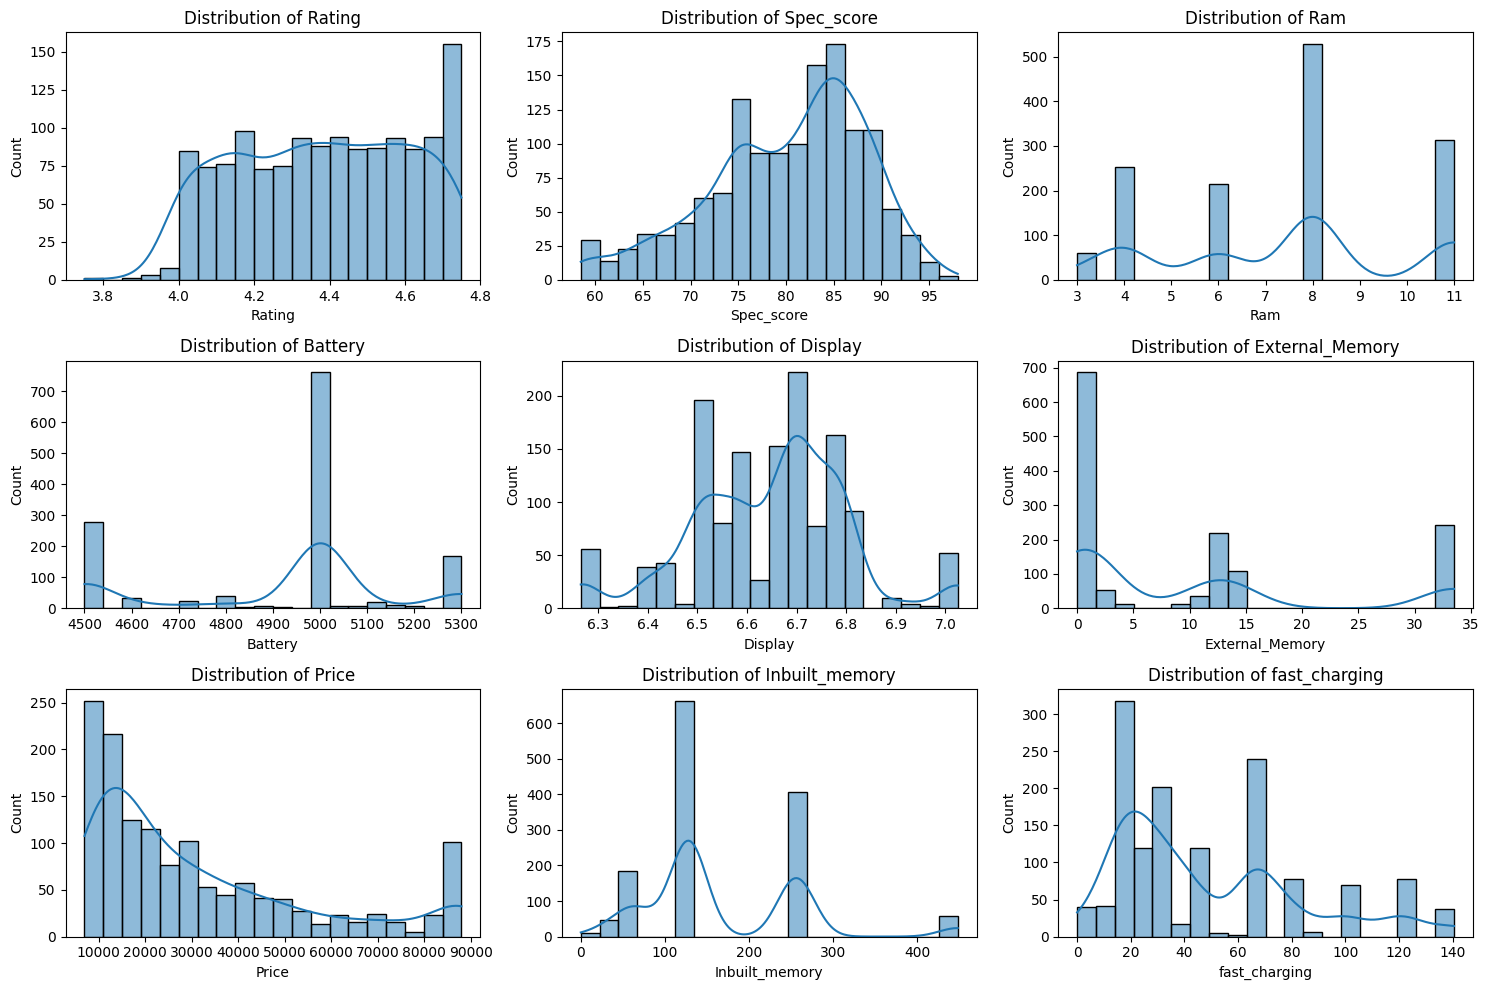

In [56]:

plt.figure(figsize=(15,10))
for i, col in enumerate(numerical_cols):
    plt.subplot(3,3,i+1)
    sns.histplot(df[col], kde=True, bins=20)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

# single layer perceptron

In [65]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import tensorflow as tf

In [59]:
from sklearn.preprocessing import LabelEncoder

# --- Step 3: Define features and target ---
X = df.drop(columns=['Price', 'Category', 'Screen_resolution'])
y = df['Category']

# Label encode target
y = LabelEncoder().fit_transform(y)   # Low = 0, High = 1

# --- Step 4: Convert categorical features to dummy variables ---
categorical_cols = ['No_of_sim', 'Processor', 'Processor_name', 'Android_version', 'company']
categorical_cols = [col for col in categorical_cols if col in X.columns]
X = pd.get_dummies(X, columns=categorical_cols)

# --- Step 5: Clean numeric columns ---
# Camera → keep first number and fill NaNs
X['Camera'] = X['Camera'].str.extract(r'(\d+)').astype(float).fillna(0)

# Convert remaining object columns to numeric, fill NaNs with 0
for col in X.columns:
    if X[col].dtype == 'object':
        X[col] = pd.to_numeric(X[col], errors='coerce').fillna(0)

# Ensure all are float32 for Keras
X = X.astype('float32')

# --- Step 6: Train-test split ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Step 7: Scale features ---
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# --- Step 8: Build Single-Layer Perceptron ---
model = Sequential([
    Dense(1, activation='sigmoid', input_shape=(X_train.shape[1],))
])

# --- Step 9: Compile ---
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# --- Step 10: Train ---
history = model.fit(X_train, y_train, epochs=45, batch_size=16, validation_split=0.2)

# --- Step 11: Evaluate ---
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", accuracy)

# --- Step 12: Predictions ---
y_pred = (model.predict(X_test) > 0.5).astype(int)

# Compare actual vs predicted
comparison = pd.DataFrame({
    "Actual": y_test,
    "Predicted": y_pred.reshape(-1)
})

loss, accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", accuracy)

y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)


print(y_pred[:10])
print(y_test[:10])



comparison = pd.DataFrame({
    "Actual": y_test,
    "Predicted": y_pred.reshape(-1)
})

comparison["Actual_Label"] = comparison["Actual"].map({0:"Low", 1:"High"})
comparison["Predicted_Label"] = comparison["Predicted"].map({0:"Low", 1:"High"})

print(comparison.head(20))


Epoch 1/45


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5352 - loss: 0.8625 - val_accuracy: 0.5045 - val_loss: 0.9347
Epoch 2/45
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5283 - loss: 0.8709 - val_accuracy: 0.5227 - val_loss: 0.9072
Epoch 3/45
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5554 - loss: 0.8592 - val_accuracy: 0.5364 - val_loss: 0.8809
Epoch 4/45
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5707 - loss: 0.8365 - val_accuracy: 0.5500 - val_loss: 0.8558
Epoch 5/45
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5898 - loss: 0.7895 - val_accuracy: 0.5591 - val_loss: 0.8317
Epoch 6/45
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5564 - loss: 0.8005 - val_accuracy: 0.5864 - val_loss: 0.8090
Epoch 7/45
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6141 - loss: 0.7547 - val_accuracy: 0.6182 - val_loss: 0.7870
Epoch 8/45
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6177 - loss: 0.7471 - val_accuracy: 0.6273 - val_loss: 0.7663
Epo

In [60]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)


Confusion Matrix:
 [[130  21]
 [  5 118]]


In [61]:
from sklearn.metrics import classification_report

print("Classification Report:\n")
print(classification_report(y_test, y_pred))


Classification Report:

              precision    recall  f1-score   support

           0       0.96      0.86      0.91       151
           1       0.85      0.96      0.90       123

    accuracy                           0.91       274
   macro avg       0.91      0.91      0.90       274
weighted avg       0.91      0.91      0.91       274



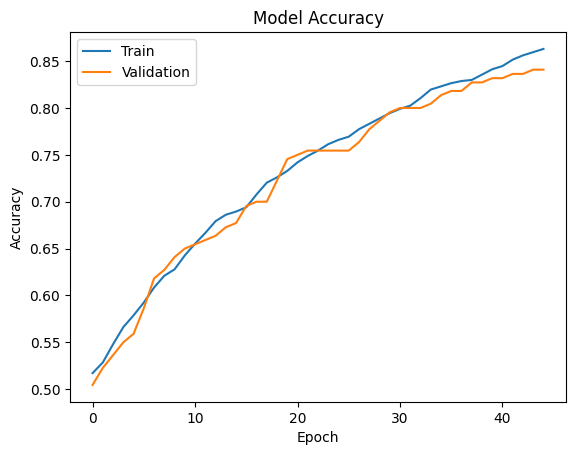

In [62]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.show()


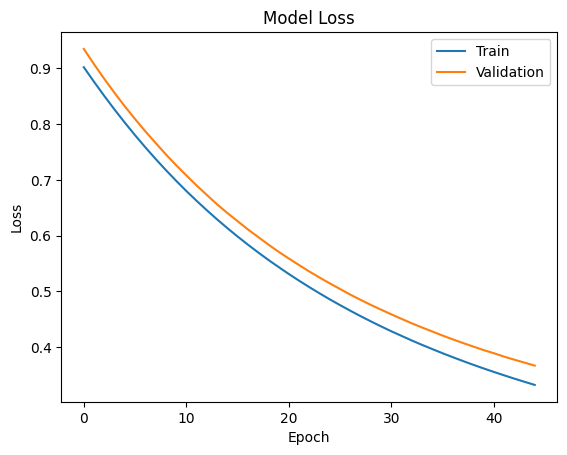

In [63]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.show()


# Multi-layer Perceptron

In [66]:

# Fix random seeds
np.random.seed(42)
tf.random.set_seed(42)


X = df.drop(columns=['Price', 'Category', 'Screen_resolution'])
y = df['Category']

# Label encode target (Low=0, High=1)
y = LabelEncoder().fit_transform(y)

categorical_cols = ['No_of_sim', 'Processor', 'Processor_name', 'Android_version', 'company']
categorical_cols = [col for col in categorical_cols if col in X.columns]

X = pd.get_dummies(X, columns=categorical_cols)

# Camera → keep first number
X['Camera'] = X['Camera'].str.extract(r'(\d+)').astype(float).fillna(0)

# Convert remaining object columns to numeric
for col in X.columns:
    if X[col].dtype == 'object':
        X[col] = pd.to_numeric(X[col], errors='coerce').fillna(0)

# Convert all to float32 for Keras
X = X.astype('float32')


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#build model
model_mlp = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    #Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    #Dropout(0.2),
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

model_mlp.compile(
    optimizer=Adam(learning_rate=0.0005),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model_mlp.summary()


history = model_mlp.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=45,
    batch_size=32
)


loss, accuracy = model_mlp.evaluate(X_test, y_test)
print("Test Accuracy:", accuracy)


y_pred_prob = model_mlp.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

# Compare actual vs predicted
comparison = pd.DataFrame({
    "Actual": y_test,
    "Predicted": y_pred.reshape(-1)
})
print(comparison.head(20))


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                 │ (None, 128)            │        46,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 57,217 (223.50 KB)

 Trainable params: 57,217 (223.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/45
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.6092 - loss: 0.6818 - val_accuracy: 0.9045 - val_loss: 0.4558
Epoch 2/45
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9046 - loss: 0.3925 - val_accuracy: 0.9182 - val_loss: 0.2737
Epoch 3/45
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9256 - loss: 0.2106 - val_accuracy: 0.9227 - val_loss: 0.2359
Epoch 4/45
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9463 - loss: 0.1385 - val_accuracy: 0.9273 - val_loss: 0.2296
Epoch 5/45
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9616 - loss: 0.1052 - val_accuracy: 0.9318 - val_loss: 0.2261
Epoch 6/45
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9729 - loss: 0.0842 - val_accuracy: 0.9273 - val_loss: 0.2287
Epoch 7/45
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9760 - loss: 0.0713 - val_accuracy: 0.9273 - val_loss: 0.2364
Epoch 8/45
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9796 - loss: 0.0609 - val_accuracy: 0.9273 - val_loss

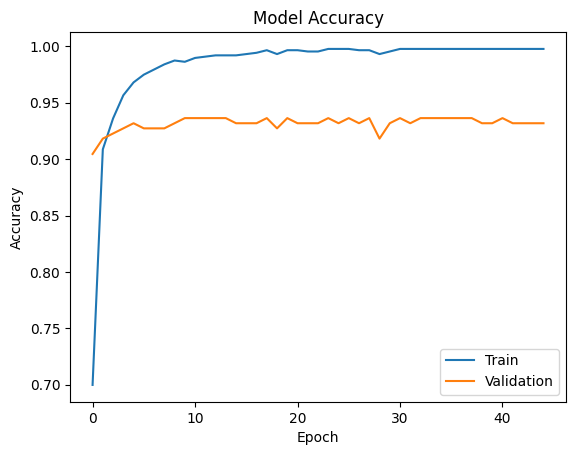

In [67]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.show()


# ANN

In [68]:
# --- Step 0: Fix seeds for reproducibility ---
np.random.seed(42)
tf.random.set_seed(42)


# ---Features & target ---
X = df.drop(columns=['Price', 'Category', 'Screen_resolution'])
y = df['Category']
y = LabelEncoder().fit_transform(y)  # Low=0, High=1

# --- One-hot encode categorical features ---
categorical_cols = ['No_of_sim', 'Processor', 'Processor_name', 'Android_version', 'company']
categorical_cols = [col for col in categorical_cols if col in X.columns]
X = pd.get_dummies(X, columns=categorical_cols)

# --- Clean numeric columns ---
X['Camera'] = X['Camera'].str.extract(r'(\d+)').astype(float).fillna(0)
for col in X.columns:
    if X[col].dtype == 'object':
        X[col] = pd.to_numeric(X[col], errors='coerce').fillna(0)
X = X.astype('float32')

# --- Train-test split ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Standardize features ---
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# ---  Build model ---
model_ann = Sequential([
    Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.4),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # Output layer
])

# --- Compile ---
model_ann.compile(
    optimizer=Adam(learning_rate=0.0005),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# --- Model summary ---
model_ann.summary()

# --- Train ---
history = model_ann.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=32
)

# --- Evaluate ---
loss, accuracy = model_ann.evaluate(X_test, y_test)
print("Test Accuracy:", accuracy)

# ---  Predictions ---
y_pred_prob = model_ann.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

# Compare actual vs predicted
comparison = pd.DataFrame({
    "Actual": y_test,
    "Predicted": y_pred.reshape(-1)
})
print(comparison.head(20))


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 256)            │        92,672 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 135,937 (531.00 KB)

 Trainable params: 135,937 (531.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.5435 - loss: 0.7157 - val_accuracy: 0.8273 - val_loss: 0.5611
Epoch 2/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7563 - loss: 0.5566 - val_accuracy: 0.8955 - val_loss: 0.3949
Epoch 3/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8309 - loss: 0.4423 - val_accuracy: 0.9227 - val_loss: 0.2643
Epoch 4/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8920 - loss: 0.3052 - val_accuracy: 0.9182 - val_loss: 0.2377
Epoch 5/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9255 - loss: 0.2203 - val_accuracy: 0.9136 - val_loss: 0.2348
Epoch 6/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9210 - loss: 0.2092 - val_accuracy: 0.9136 - val_loss: 0.2344
Epoch 7/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9201 - loss: 0.1963 - val_accuracy: 0.9182 - val_loss: 0.2347
Epoch 8/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9527 - loss: 0.1446 - val_accuracy: 0.9273 - val_los

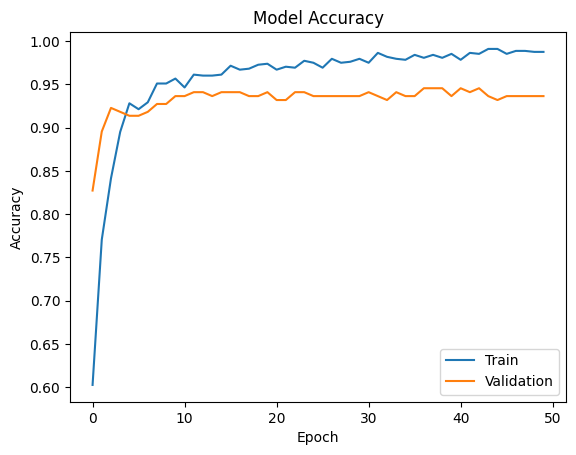

In [69]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.show()


#ANN

In [70]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# --- Step 0: Fix seeds ---
np.random.seed(42)
tf.random.set_seed(42)


# --- Step 3: Features & target ---
X = df.drop(columns=['Price', 'Category', 'Screen_resolution'])
y = df['Category']
y = LabelEncoder().fit_transform(y)

# --- Step 4: One-hot encode categorical features ---
categorical_cols = ['No_of_sim', 'Processor', 'Processor_name', 'Android_version', 'company']
categorical_cols = [col for col in categorical_cols if col in X.columns]
X = pd.get_dummies(X, columns=categorical_cols)

# --- Step 5: Clean numeric columns ---
# Camera → keep only main rear camera
X['Camera'] = X['Camera'].str.extract(r'(\d+)').astype(float).fillna(0)



# Convert remaining object columns to numeric
for col in X.columns:
    if X[col].dtype == 'object':
        X[col] = pd.to_numeric(X[col], errors='coerce').fillna(0)

X = X.astype('float32')

# --- Step 6: Train-test split ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Step 7: Standardize features ---
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# --- Step 8: Build Optimized ANN ---
model_opt = Sequential([
    Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

# --- Step 9: Compile model ---
model_opt.compile(
    optimizer=Adam(learning_rate=0.0005),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# --- Step 10: Early stopping ---
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# --- Step 11: Train model ---
history = model_opt.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=55,
    batch_size=32,
    callbacks=[early_stop]
)

# --- Step 12: Evaluate model ---
loss, accuracy = model_opt.evaluate(X_test, y_test)
print("Test Accuracy:", accuracy)

# --- Step 13: Predictions ---
y_pred_prob = model_opt.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

# --- Compare actual vs predicted ---
comparison = pd.DataFrame({
    "Actual": y_test,
    "Predicted": y_pred.reshape(-1)
})
print(comparison.head(20))


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/55
28/28 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.5087 - loss: 0.7492 - val_accuracy: 0.7682 - val_loss: 0.6559
Epoch 2/55
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6135 - loss: 0.6712 - val_accuracy: 0.8818 - val_loss: 0.5825
Epoch 3/55
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7337 - loss: 0.5881 - val_accuracy: 0.9091 - val_loss: 0.3858
Epoch 4/55
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7960 - loss: 0.4392 - val_accuracy: 0.9136 - val_loss: 0.2447
Epoch 5/55
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8968 - loss: 0.2831 - val_accuracy: 0.9364 - val_loss: 0.1799
Epoch 6/55
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9154 - loss: 0.2067 - val_accuracy: 0.9364 - val_loss: 0.2109
Epoch 7/55
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9323 - loss: 0.1731 - val_accuracy: 0.9364 - val_loss: 0.2075
Epoch 8/55
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9513 - loss: 0.1298 - val_accuracy: 0.9409 - val_loss

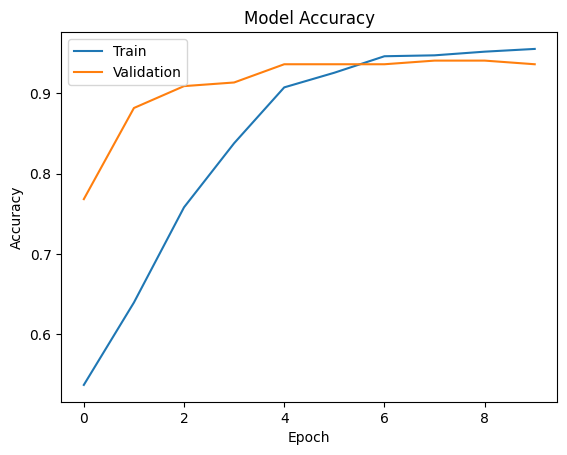

In [71]:
# plot Multi layer perceptron accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.show()


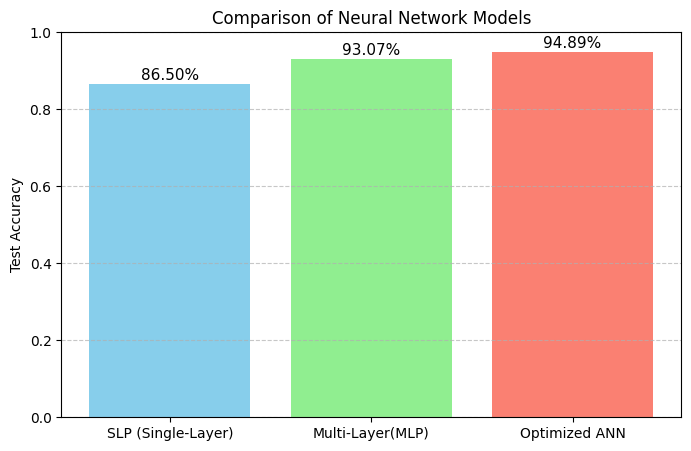

In [72]:

# Accuracy values from your experiments
models = ['SLP (Single-Layer)', 'Multi-Layer(MLP)', 'Optimized ANN']
accuracy = [ 0.8649635314941406,  0.930656909942627,  0.9489051103591919]  # Replace with your exact test accuracy if different

# Create bar chart
plt.figure(figsize=(8,5))
bars = plt.bar(models, accuracy, color=['skyblue', 'lightgreen', 'salmon'])
plt.ylim(0, 1)
plt.ylabel('Test Accuracy')
plt.title('Comparison of Neural Network Models')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add value labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.01, f'{height*100:.2f}%', ha='center', fontsize=11)

plt.show()
